In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq 
from scipy.stats import linregress

# 上海test

In [3]:
df = pd.read_excel(r"C:\Users\tunag\Desktop\liner_regression.xlsx")

In [9]:
df.columns

Index(['年份', ' 中国国内总储蓄(现价亿美元)', ' 中国GDP（本币）(现价本币)（亿）', '年末人口（万人）',
       '社会消费品零售总额(亿元)'],
      dtype='object')

In [5]:
def fun(p,x1,x2,x3):
    a,b,c,d = p
    return a*x1 + b*x2 + c*x3 +d

In [6]:
def err(p, x1, x2, x3, y):
    return fun(p,x1,x2,x3) - y

In [7]:
p = [1,1,1,1]

In [13]:
x1 = df.iloc[:,1]
x2 = df.iloc[:,2]
x3 = df.iloc[:,3]
y = df.iloc[:,4]

In [14]:
output = leastsq(err,p,args=(x1,x2,x3,y))

In [15]:
print(output)

(array([-2.35838249e+00,  7.45319075e-01, -8.14229020e+00,  1.01377828e+06]), 1)


In [17]:
a,b,c,d = output[0]

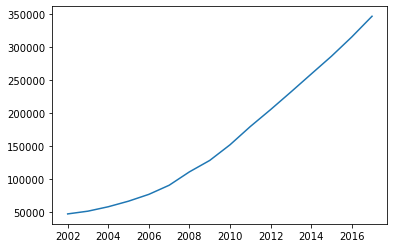

In [20]:
plt.plot(df.iloc[:,0],y)

# 单变量线性拟合

In [24]:
def fitfunc1(p,x): #定义拟合函数为单变量线性方程
    p0, p1 = p
    y = p0 + p1*x
    return y 

In [26]:
def error1(p,x,y): #定义观测值和拟合值之间的误差函数
    err = fitfunc1(p,x) - y
    return err

In [27]:
p = [2.5, 1.5] # y = p[0] + p[1] * x
x = np.array([0., 0.5, 1.5, 2.5, 4.5, 5.5, 7.5, 8.0, 8.5, 9.0, 10.0]) 
y = p[0] + p[1] * x #理论值y
yObs = y + np.random.randn(x.shape[-1])

print(x.shape, y.shape, yObs.shape)

(11,) (11,) (11,)


In [28]:
#根据leastsq的结果和x的实际值求得拟合函数的参数
p0 = [1,1] #参数的初始值，只会影响计算时长，不会影响最终结果
pFit, info = leastsq(error1, p0, args=(x, yObs))

In [29]:
print("Data fitting with Scipy.optimize.leastsq")
print("y = p[0] + p[1] * x")
print("p[0] = {:.4f}\np[1] = {:.4f}".format(pFit[0], pFit[1]))

Data fitting with Scipy.optimize.leastsq
y = p[0] + p[1] * x
p[0] = 2.9340
p[1] = 1.4775


In [30]:
yFit = fitfunc1(pFit, x)
slope, intercept, r_value, p_value, std = linregress(x, yObs)
print("\nLinear regress with Scipy.stats.linregress")
print("y = p[0] + p[1] * x")
print("p[0] = {:.4f}".format(intercept)) # 输出截距 intercept
print("p[1] = {:.4f}".format(slope)) # 输出斜率 slope
print("r^2_value: {:.4f}".format(r_value**2)) # 输出 r^2 值
print("p_value: {:.4f}".format(p_value)) # 输出 p 值
print("std: {:.4f}".format(std)) # 输出标准差 std


Linear regress with Scipy.stats.linregress
y = p[0] + p[1] * x
p[0] = 2.9340
p[1] = 1.4775
r^2_value: 0.9438
p_value: 0.0000
std: 0.1202


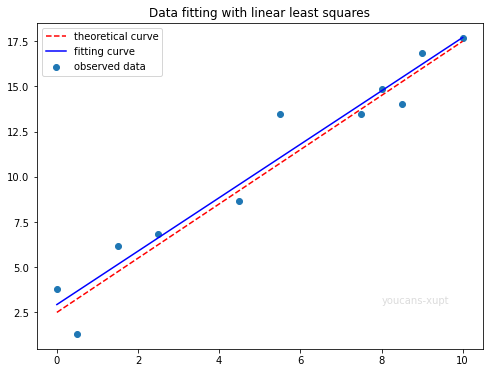

In [31]:
fig, ax = plt.subplots(figsize=(8,6))
ax.text(8,3,"youcans-xupt",color='gainsboro')
ax.set_title("Data fitting with linear least squares")
plt.scatter(x, yObs, label="observed data") #观测值（理论值y加了白噪音）
plt.plot(x, y, 'r--', label="theoretical curve") #理论值
plt.plot(x, yFit, 'b-', label="fitting curve") #拟合值
plt.legend(loc="best")
plt.show()

# 多变量线性拟合

In [33]:
def fitfunc2(p, x1, x2): # 定义拟合函数为直线
    p0, p1, p2 = p # 拟合函数的参数
    y = p0 + p1*x1 + p2*x2 # 拟合函数的表达式
    return y

In [34]:
def error2(p, x1, x2, y): # 定义观测值与拟合函数值的误差函数
    err = fitfunc2(p, x1, x2) - y # 计算残差
    return err

In [35]:
p = [2.5, 1.5, -0.5] # y = p[0] + p[1] * x1 + p[2] * x2
x1 = np.array([0., 0.5, 1.5, 2.5, 4.5, 5.5, 7.5, 8.0, 8.5, 9.0, 10.0])
x2 = np.array([0., 1.0, 1.5, 2.2, 4.8, 5.0, 6.3, 6.8, 7.1, 7.5, 8.0])
z = p[0] + p[1]*x1 + p[2]*x2 # 理论值 z
zObs = z + np.random.randn(x1.shape[-1])

In [36]:
p0 = [1, 1, 1] # 设置拟合函数的参数初值
pFit, info = leastsq(error2, p0, args=(x1,x2,zObs)) # 最小二乘法求拟合参数
print("Data fitting with Scipy.optimize.leastsq:")
print("z = p[0] + p[1]*x1 + p[1]*x2")
print("p[0]={:.4f}\np[1]={:.4f}\np[2]={:.4f}".format(pFit[0], pFit[1], pFit[2]))

Data fitting with Scipy.optimize.leastsq:
z = p[0] + p[1]*x1 + p[1]*x2
p[0]=2.1001
p[1]=2.1731
p[2]=-1.3389


In [ ]:
"""
https://zhuanlan.zhihu.com/p/22692029
statsmodels.api.OLS(因变量，自变量）
单纯的输出结果为一个类，需要再去调用 .fit()才能完成最终的运算
"""

In [37]:
# 由拟合函数 fitfunc 计算拟合曲线在数据点的函数值
zFit = fitfunc2(pFit, x1, x2)
# 多元线性回归：最小二乘法(OLS)
import statsmodels.api as sm
x0 = np.ones(x1.shape[-1]) # 截距列 x0=[1,...1] 返回一个大小一致且全是1的array
X = np.column_stack((x0, x1, x2)) # (nSample,3): [x0, x1, x2] 矩阵变换
model = sm.OLS(zObs, X) # 建立 OLS 模型: y = b0*x0 + b1*x1 + b2*x2 + e
results = model.fit() # 返回模型拟合结果
zFit = results.fittedvalues # 模型拟合的 y值
print(results.summary()) # 输出回归分析的摘要
print("\nOLS model: y = b0*x0 + b1*x1 + b2*x2")
print('Parameters: ', results.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     104.4
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           1.86e-06
Time:                        09:30:19   Log-Likelihood:                -12.609
No. Observations:                  11   AIC:                             31.22
Df Residuals:                       8   BIC:                             32.41
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1001      0.611      3.439      0.0

C:\Users\tunag\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


array([[ 1. ,  0. ,  0. ],
       [ 1. ,  0.5,  1. ],
       [ 1. ,  1.5,  1.5],
       [ 1. ,  2.5,  2.2],
       [ 1. ,  4.5,  4.8],
       [ 1. ,  5.5,  5. ],
       [ 1. ,  7.5,  6.3],
       [ 1. ,  8. ,  6.8],
       [ 1. ,  8.5,  7.1],
       [ 1. ,  9. ,  7.5],
       [ 1. , 10. ,  8. ]])